<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

from keras.preprocessing.image import load_img, img_to_array
from tensorflow import expand_dims
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pre_trained_model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 18s 0us/step


In [37]:
!wget "https://i.natgeofe.com/n/18708334-6fce-40b5-ade6-a7e2db7035f2/01-goldfish-nationalgeographic_1567132.jpg"
!mv "./01-goldfish-nationalgeographic_1567132.jpg" "goldfish.jpg"

!wget "https://i.natgeofe.com/k/dda017fb-7293-4c15-ba05-d1c3af2280f6/hammerhead-shark-underwater_3x2.jpg"
!mv "hammerhead-shark-underwater_3x2.jpg" "HammerheadShark.jpg"

!wget ""https://upload.wikimedia.org/wikipedia/en/thumb/9/9c/George_Floyd.png/220px-George_Floyd.png""
!mv "220px-George_Floyd.png" "GeorgeFloyd.png"

--2024-03-02 17:52:24--  https://i.natgeofe.com/n/18708334-6fce-40b5-ade6-a7e2db7035f2/01-goldfish-nationalgeographic_1567132.jpg
Resolving i.natgeofe.com (i.natgeofe.com)... 95.101.78.210, 95.101.78.169, 2a02:26f0:7100::213:c622, ...
Connecting to i.natgeofe.com (i.natgeofe.com)|95.101.78.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205293 (200K) [image/jpeg]
Saving to: ‘01-goldfish-nationalgeographic_1567132.jpg’

01-goldfish-nationa 100%[===================>] 200.48K  --.-KB/s    in 0.009s  

2024-03-02 17:52:24 (21.2 MB/s) - ‘01-goldfish-nationalgeographic_1567132.jpg’ saved [205293/205293]

--2024-03-02 17:52:24--  https://i.natgeofe.com/k/dda017fb-7293-4c15-ba05-d1c3af2280f6/hammerhead-shark-underwater_3x2.jpg
Resolving i.natgeofe.com (i.natgeofe.com)... 95.101.78.210, 95.101.78.169, 2a02:26f0:7100::213:c622, ...
Connecting to i.natgeofe.com (i.natgeofe.com)|95.101.78.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54

In [33]:
path_img = ["goldfish.jpg", "HammerheadShark.jpg", "GeorgeFloyd.png"]

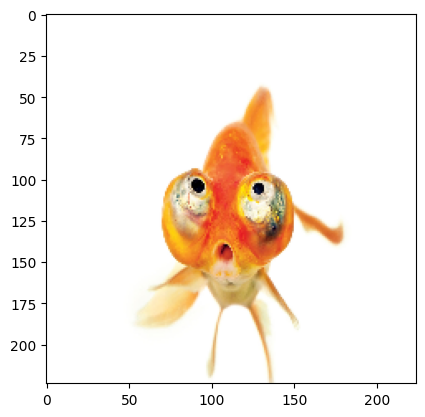

In [34]:
plt.imshow(load_img(path_img[0], target_size=(224, 224, 3)))

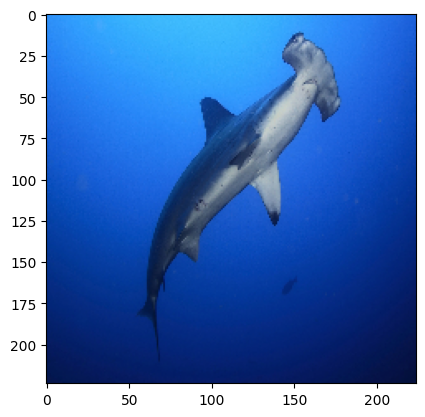

In [35]:
plt.imshow(load_img(path_img[1], target_size=(224, 224, 3)))

In [38]:
for img in path_img:
  img = load_img(img, target_size=(224, 224, 3))

  # convert to  array
  arr_img = img_to_array(img)
  print("Initial Image Shape:", arr_img.shape)

  # add the dummy dimension
  arr_img = expand_dims(arr_img, axis=0)
  print("Shape after adding first dim:", arr_img.shape)

  vgg_img = preprocess_input(arr_img)
  y_pred = pre_trained_model.predict(vgg_img)
  prediction = decode_predictions(y_pred, top=1)
  print(prediction)

Initial Image Shape: (224, 224, 3)
Shape after adding first dim: (1, 224, 224, 3)
1/1 [==============================] - 0s 20ms/step
[[('n01443537', 'goldfish', 0.563213)]]
Initial Image Shape: (224, 224, 3)
Shape after adding first dim: (1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
[[('n01494475', 'hammerhead', 0.902418)]]
Initial Image Shape: (224, 224, 3)
Shape after adding first dim: (1, 224, 224, 3)
1/1 [==============================] - 0s 23ms/step
[[('n04370456', 'sweatshirt', 0.23707634)]]


In [39]:
import torch
from torchvision.models import vgg16
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


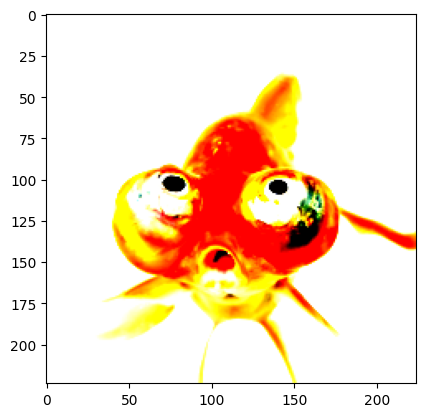

In [41]:
pytorch_model = vgg16(pretrained=True)

# batch normalization & Drop_out freezing
pytorch_model.eval()

# input preprocessing
preprocess_transform = transforms.Compose([transforms.Resize(256),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                std=[0.229, 0.224, 0.225])])

path_img = "goldfish.jpg"
img = Image.open(path_img)

proc_img = preprocess_transform(img)
print(proc_img.shape)
plt.imshow(proc_img.cpu().permute(1, 2, 0).numpy())

torch_img = torch.unsqueeze(proc_img, 0)
print(torch_img.shape)
torch_img = torch_img.to(torch.float) # convert to float

with torch.no_grad():
  pred = pytorch_model(torch_img)

In [44]:
# Print top 5 predictions (indices)
_, indices = torch.sort(pred, descending=True)
print(indices[0][:5])

# It can help reduce the chances of merge conflicts

tensor([  1, 719,  88, 902, 749])


In [45]:
import json
from urllib import request

# Download the imagenet class index
url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
imagenet_classes = json.loads(request.urlopen(url).read().decode())

# Assuming "indices" is a tensor of predicted class indices
for idx in indices[0][:5]:
  class_id = str(idx.item())
  print(imagenet_classes[class_id][1])

goldfish
piggy_bank
macaw
whistle
quill
